In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.linear_model import LogisticRegression #machine learning
from sklearn.metrics import mean_squared_error #model evaluation
from sklearn.metrics import accuracy_score

In [2]:
stroke_df=pd.read_csv("../Unit-3-01-Linear-Regression/stroke.csv")
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0


In [3]:
stroke_df.isnull().sum() 

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

In [4]:
stroke_df=stroke_df.dropna(subset=['bmi'])

In [5]:
y=stroke_df.stroke.values
X=stroke_df.drop(["stroke"],axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
accuracies={}


lr=LogisticRegression()
lr.fit(X_train,y_train)

acc=lr.score(X_test,y_test)*100

y_pred = lr.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

accuracies["Logistic Regression"]=acc

print("Test Accuracy {:.2f}% ".format(acc))

Accuracy: 0.91
Test Accuracy 91.10% 


C:\Users\tiven\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.tree import DecisionTreeClassifier


dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

acc=dtc.score(X_test,y_test)*100


accuracies["DecisionTreeClassifier"]=acc

print("Test Accuracy {:.2f}% ".format(acc))

Test Accuracy 87.42% 


In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

acc=rfc.score(X_test,y_test)*100


accuracies["RandomForestClassifier"]=acc

print("Test Accuracy {:.2f}% ".format(acc))

Test Accuracy 91.10% 


In [10]:
from sklearn.neighbors import KNeighborsClassifier

kc=KNeighborsClassifier()
kc.fit(X_train,y_train)

acc=kc.score(X_test,y_test)*100


accuracies["KNeighborsClassifier"]=acc

print("Test Accuracy {:.2f}% ".format(acc))

Test Accuracy 90.49% 


In [11]:
print(accuracies)

{'Logistic Regression': 91.1042944785276, 'DecisionTreeClassifier': 87.42331288343557, 'RandomForestClassifier': 91.1042944785276, 'KNeighborsClassifier': 90.49079754601227}


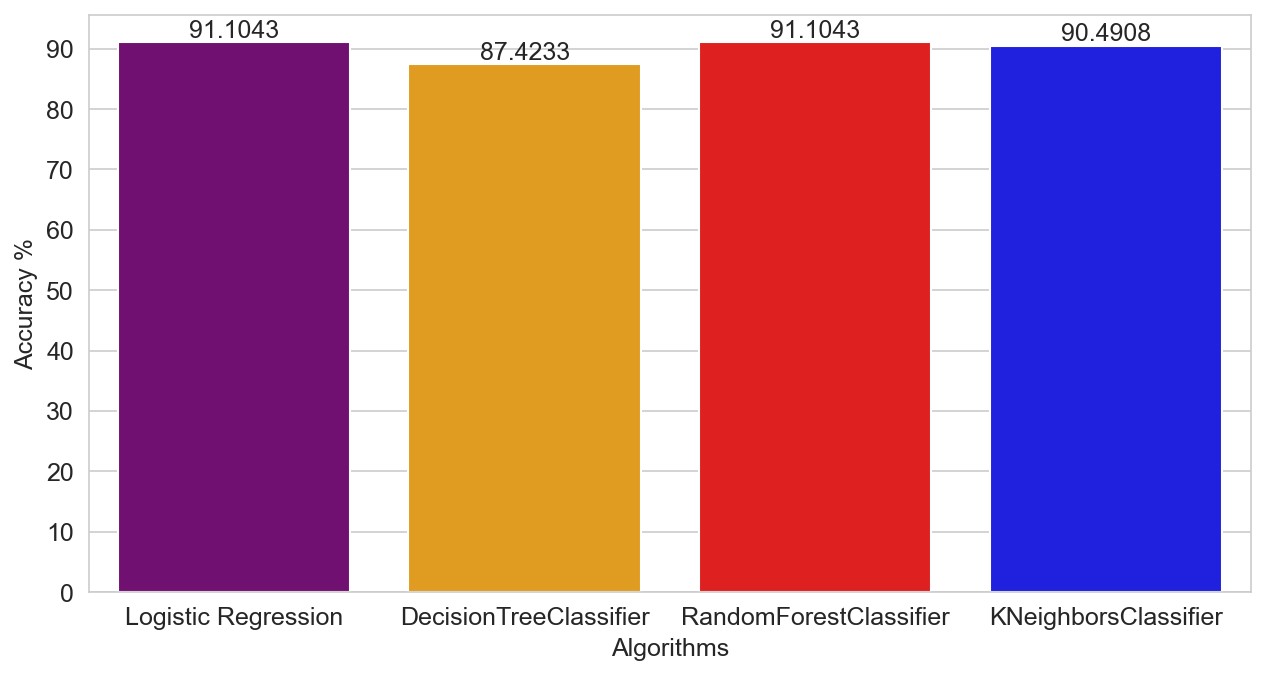

In [12]:
colors=["purple","orange","red","blue"]


sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")

ax=sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()),palette=colors)


for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

In [13]:
y_head_lr=lr.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,y_head_lr)

y_head_dtc=dtc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_dtc=confusion_matrix(y_test,y_head_dtc)


y_head_rfc=rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_rfc=confusion_matrix(y_test,y_head_rfc)

y_head_kc=kc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_kc=confusion_matrix(y_test,y_head_kc)

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}>

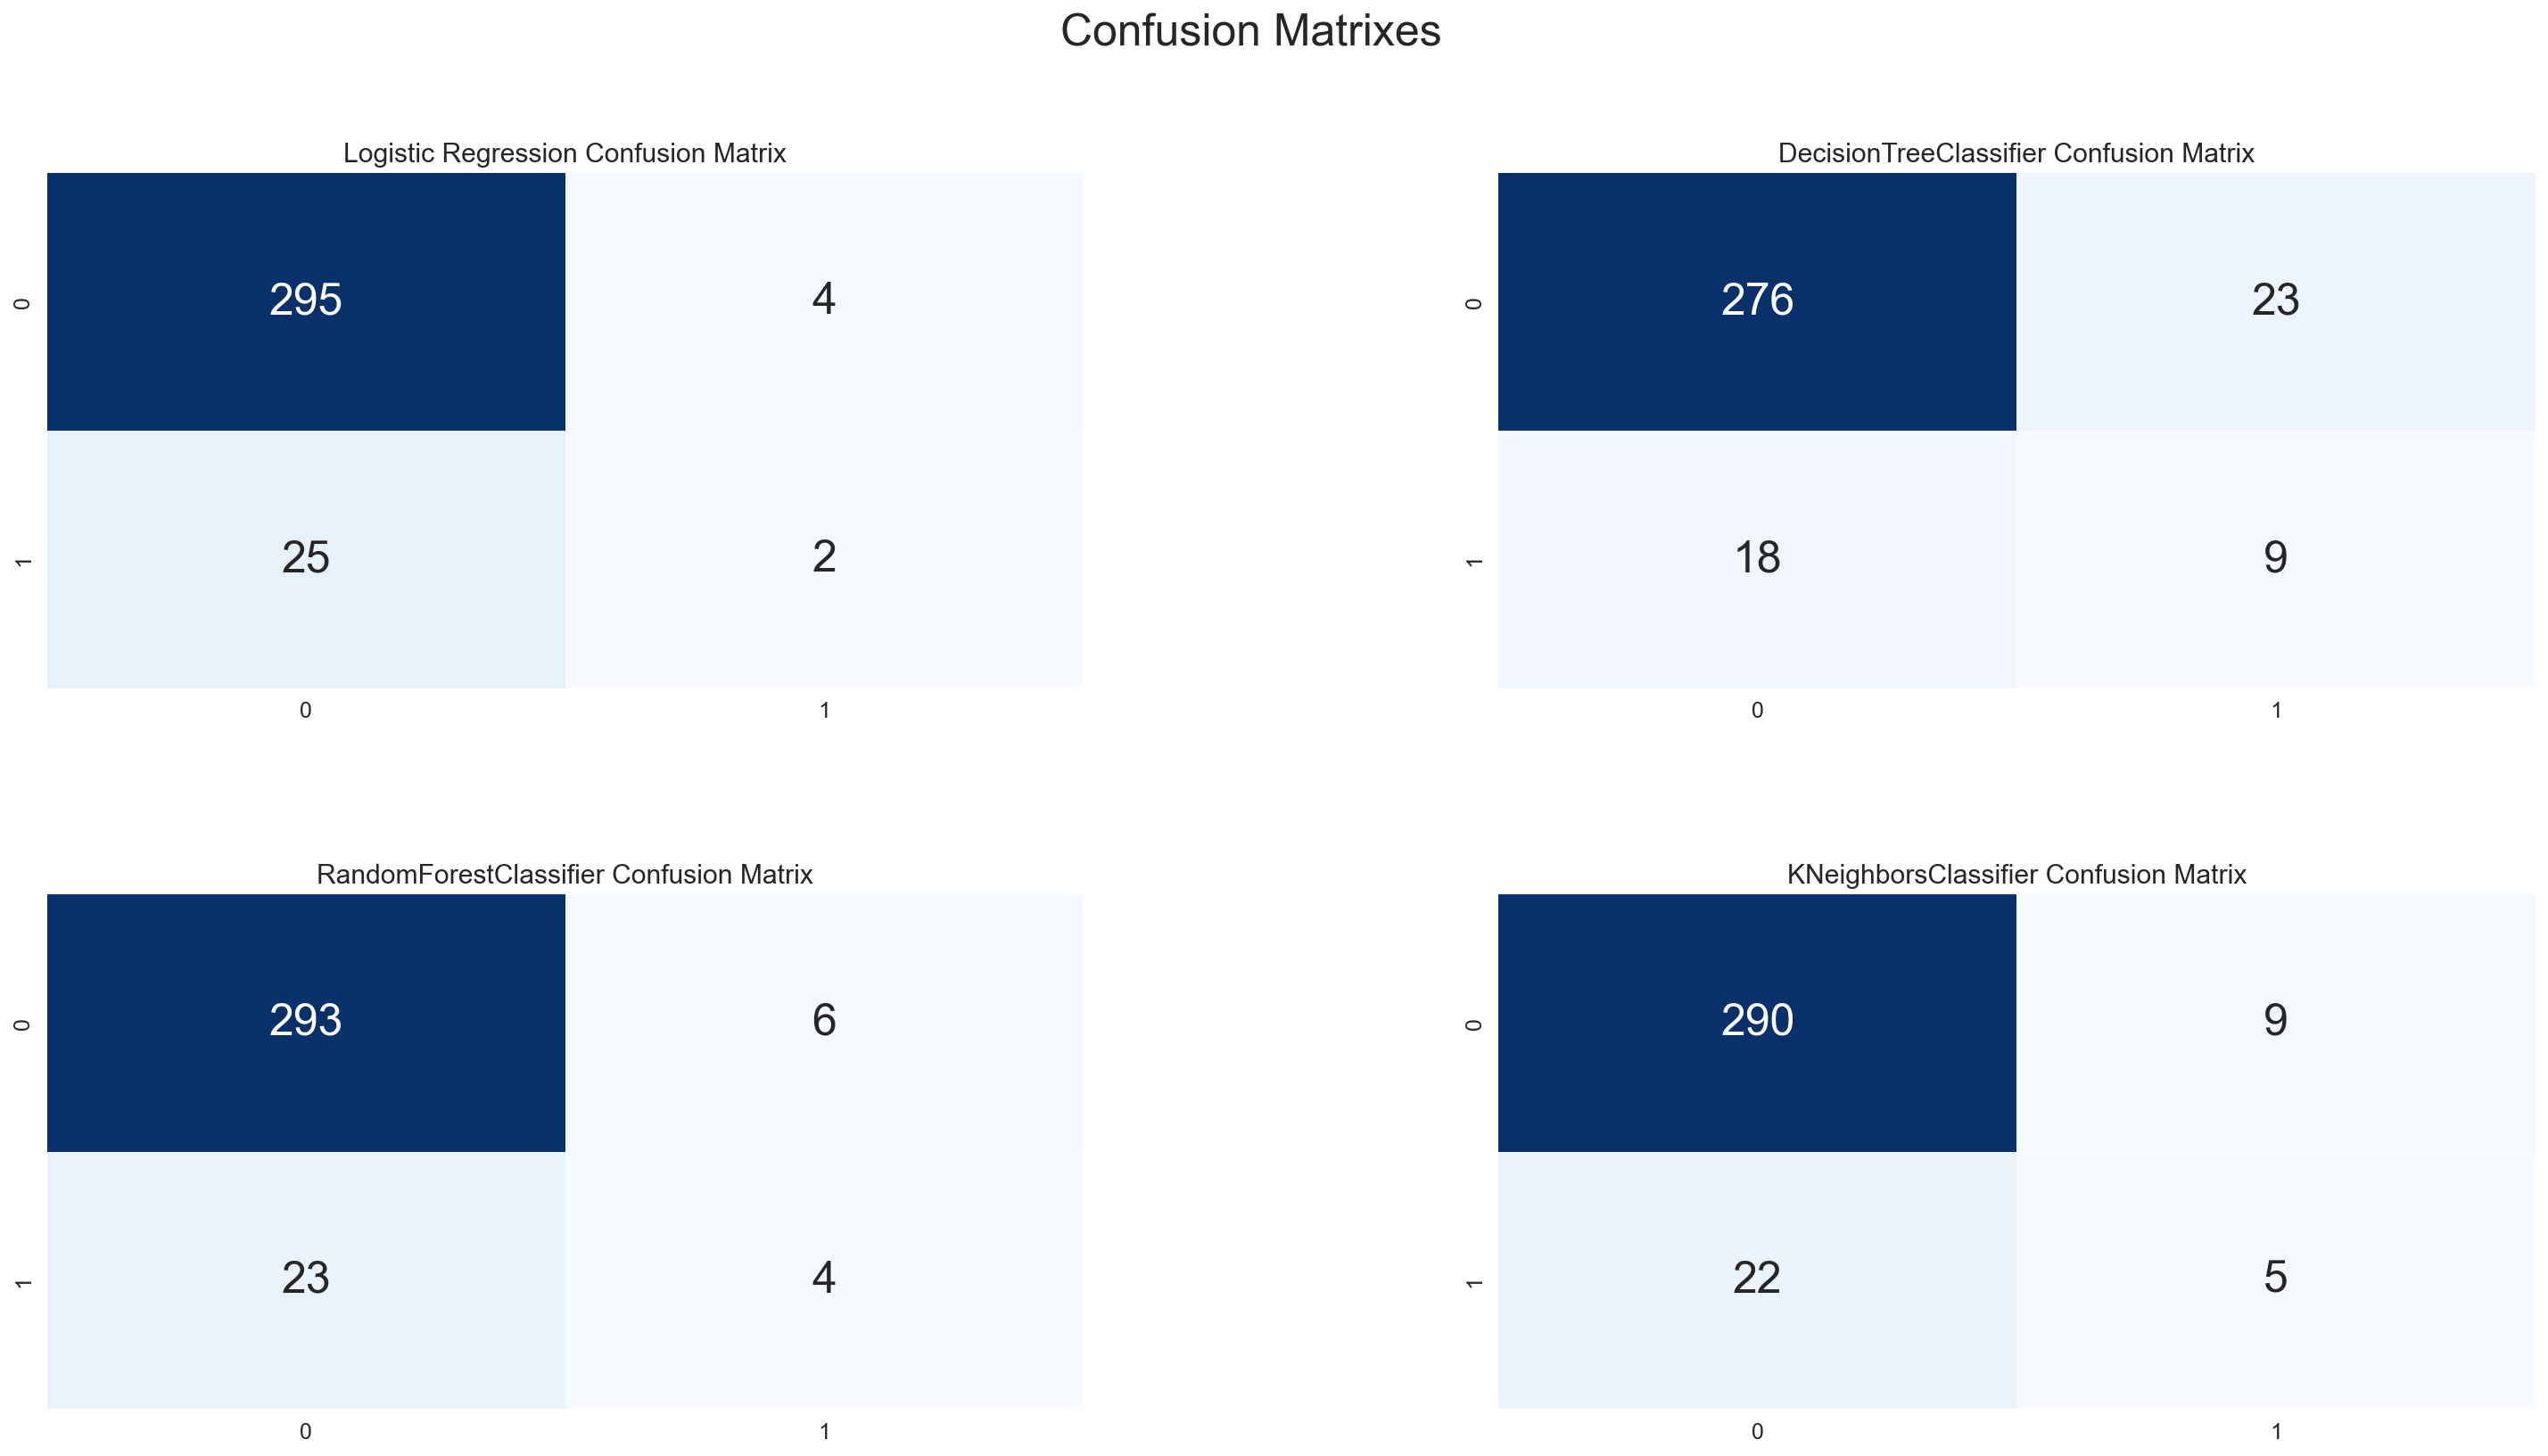

In [14]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("DecisionTreeClassifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,2,3)
plt.title("RandomForestClassifier Confusion Matrix")
sns.heatmap(cm_rfc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,2,4)
plt.title("KNeighborsClassifier Confusion Matrix")
sns.heatmap(cm_kc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

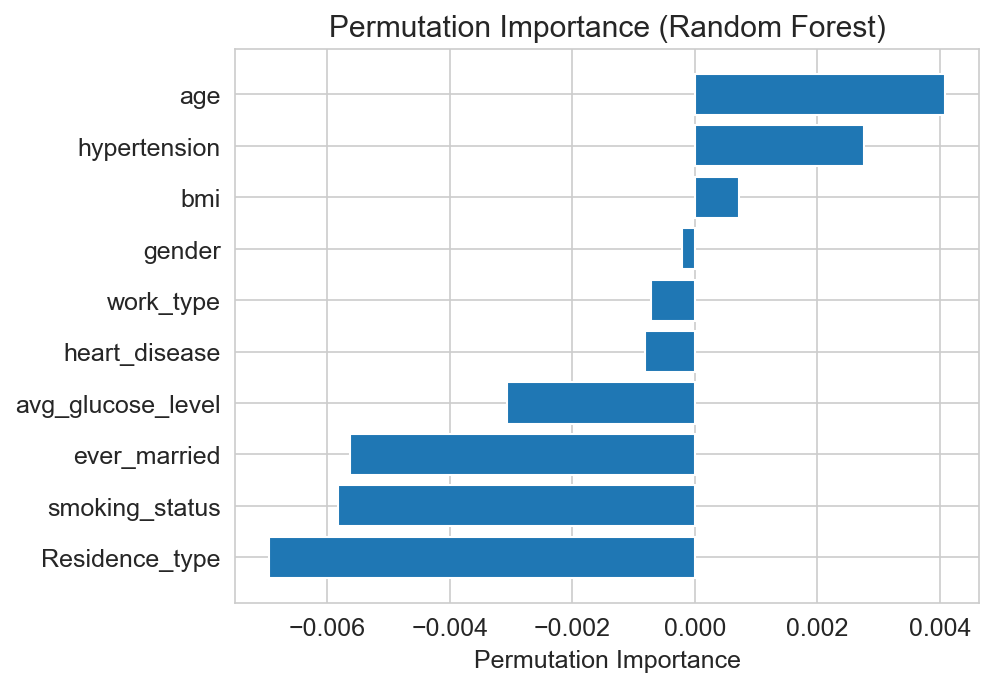

In [15]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rfc, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()

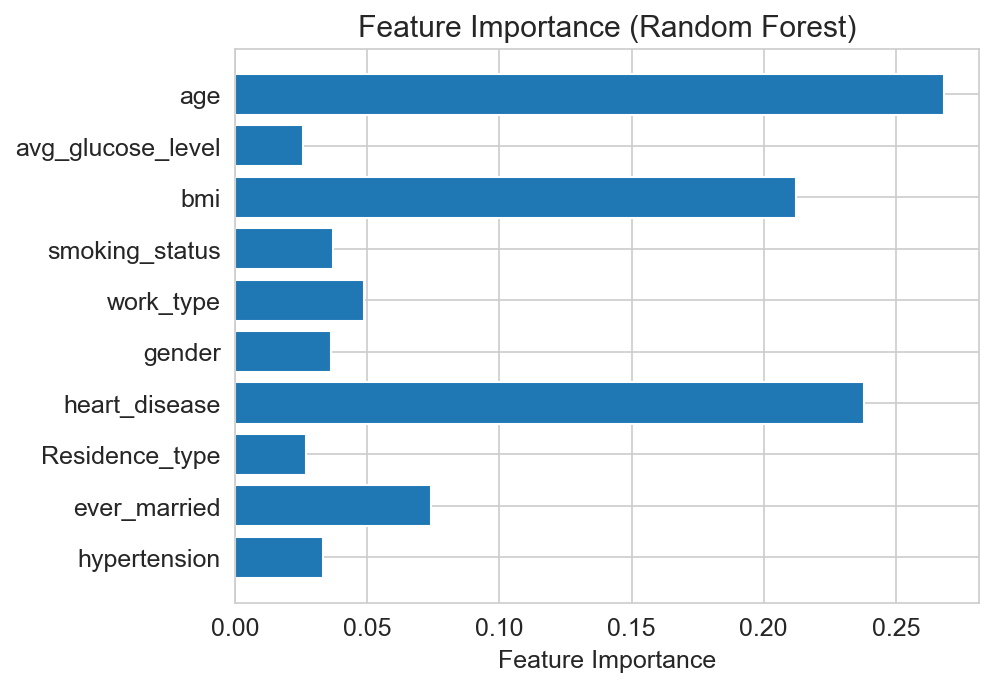

In [16]:
# Get feature importances from RandomForest
rf_feature_importances = rfc.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()
plt.show()

In [17]:
y=stroke_df.stroke.values
X=stroke_df[["age","avg_glucose_level","ever_married"]].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
accuracies={}


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [20]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0


In [21]:
y=stroke_df.stroke.values
X=stroke_df[["bmi","smoking_status","work_type","gender","heart_disease","hypertension","Residence_type"]].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [27]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision tree
import matplotlib.pyplot as plt
import pydotplus

In [28]:
important_features = ['age', 'avg_glucose_level', 'bmi', 'work_type']

In [30]:
f = stroke_df[important_features] #input
t = stroke_df['stroke'] #target

In [31]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True

In [34]:
t.unique()

array([0, 1], dtype=int64)